### Library

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
current_palette = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from IPython.display import clear_output
sns.set_style('darkgrid')
np.random.seed(0)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.metrics as mt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from plot_confusion_matrix import plot_confusion_matrix
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,34))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
import obtain as ob

### Obtain and Scrubbing

In [7]:
model = ob.DATA_CLASS()
df = model.df
model.tree_dataframe()
model.df = model.tree_df
model.numerical_columns()
num_df = model.df
target = model.target
step = 10
bins = [0, df[target].quantile(.25), df[target].quantile(.75), 1.01]
num_df = num_df.drop(columns='max_payment')


### Explore

<a href='Initial_EDA.ipynb'>See Initial EDA</a>

### Model

#### Selecting Hyperparameters

In [8]:
y= pd.cut(model.target_df,bins, right=False).astype(str)
X = num_df
target_names = [i for i in y.value_counts().sort_values().index]

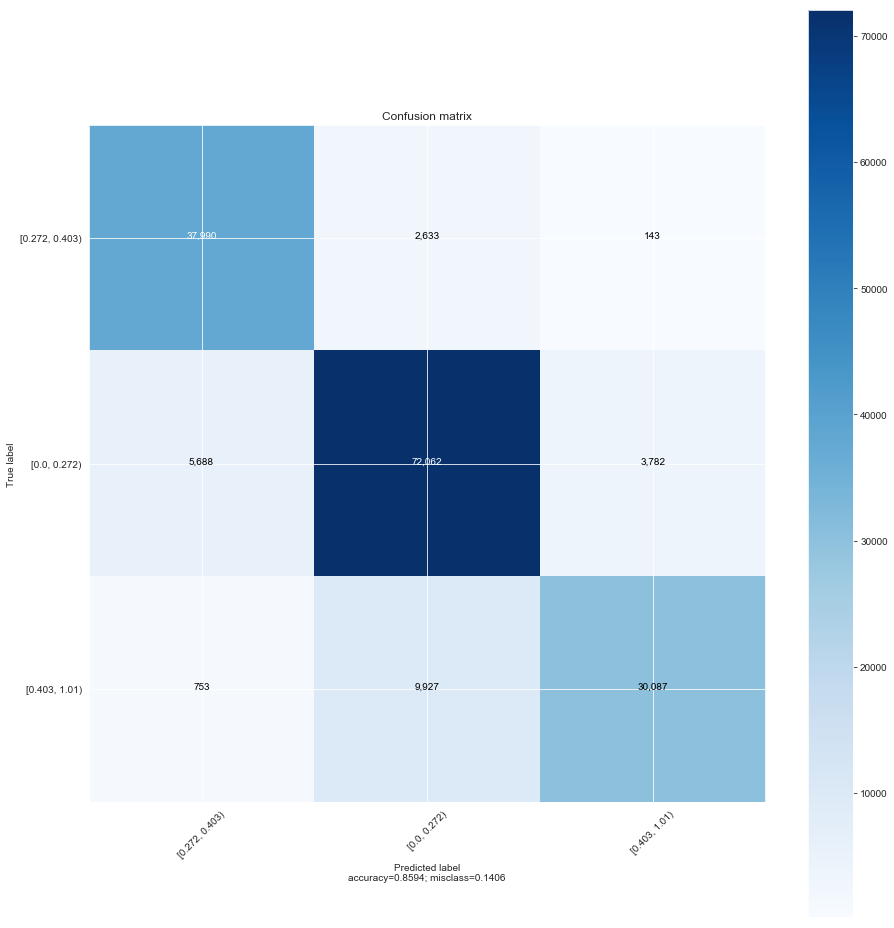

In [9]:
tree = DecisionTreeClassifier(max_depth=None)
tree.fit(X, y)
pred = tree.predict(X)
cnf_matrix = confusion_matrix(y, pred)
ax = plot_confusion_matrix(cnf_matrix, y.unique(), normalize=False)

In [13]:
tree.get_depth()

78

In [24]:
df_feature_importance = pd.Series(data = tree.feature_importances_, index= X.columns).sort_values(ascending=False)
df_feature_importance = df_feature_importance.drop(index=model.cms_label_df.columns)
initial_score = tree.score(X,y)
importance_list = []
check = 1
X_=X
transfer_tree = DecisionTreeClassifier(max_depth=50)
while check:
    X_ = X_.drop(columns=df_feature_importance.index[0])
    transfer_tree.fit(X_, y)
    top_feature = pd.Series(data = transfer_tree.feature_importances_, index= X_.columns).sort_values(ascending=False).index[0]
    score = transfer_tree.score(X_,y)
    transfer_dict = {'feature':df_feature_importance.index[0], 'change':score, 'new_feature':top_feature}
    importance_list.append(transfer_dict)
    df_feature_importance = pd.Series(data = transfer_tree.feature_importances_, index= X_.columns).sort_values(ascending=False)
    df_feature_importance = df_feature_importance.drop(index=model.cms_label_df.columns)
    check = len(df_feature_importance)
    print(transfer_tree.get_depth(), len(X_.columns))
df_importance_drop_all = pd.DataFrame(importance_list)

50 275
50 274
50 273
50 272
50 271
50 270
50 269
50 268
50 267
50 266
50 265
50 264
50 263
50 262
50 261
50 260
50 259
50 258
50 257
50 256
50 255
50 254
50 253
50 252
50 251
50 250
50 249
50 248
50 247
50 246
50 245
50 244
50 243
50 242
50 241
50 240
50 239
50 238
50 237
50 236
50 235
50 234
50 233
50 232
50 231
50 230
50 229
50 228
50 227
50 226
50 225
50 224
50 223
50 222
50 221
50 220
50 219
50 218
50 217
50 216
50 215
50 214
50 213
50 212
50 211
50 210
50 209
50 208
50 207
50 206
50 205
50 204
50 203
50 202
50 201
50 200
50 199
50 198
50 197
50 196
50 195
50 194
50 193
50 192
50 191
50 190
50 189
50 188
50 187
50 186
50 185
50 184
50 183
50 182
50 181
50 180
50 179
50 178
50 177
50 176
50 175
50 174
50 173
50 172
50 171
50 170
50 169
50 168
50 167
50 166
50 165
50 164
50 163
50 162
50 161
50 160
50 159
50 158
50 157
50 156
50 155
50 154
50 153
50 152
50 151
50 150
50 149
50 148
50 147
50 146
50 145
50 144
50 143
50 142
50 141
50 140
50 139
50 138
50 137
50 136
50 135
50 134
50 133

In [32]:
last = initial_score
transfer_list= []
for i in df_importance_drop_all.change.values:
    transfer_list.append(last- i)
    last = i 
    

In [34]:
df_importance_drop_all['score']= df_importance_drop_all.change
df_importance_drop_all.change = transfer_list


In [40]:

important_features = df_importance_drop_all.sort_values('change', ascending=False)['feature'].values[:20]

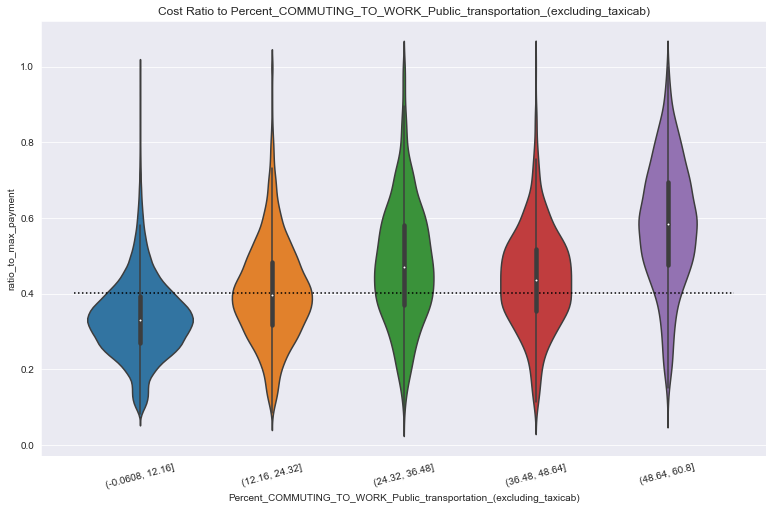

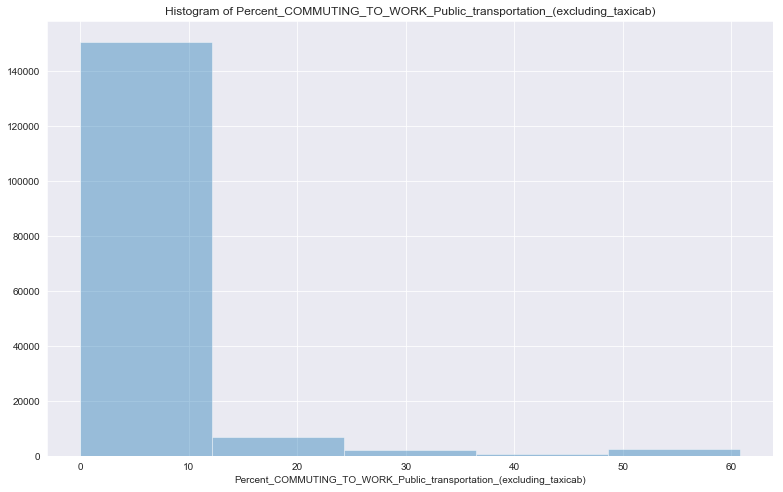

In [89]:
j ='Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)'
if 'COMMUTING' in j:
        bins=5
        plot_=df[[j, target]]
        plot_[j] = pd.cut(plot_[j], bins)

        plt.figure(figsize=(13,8))
       
        sns.violinplot(x=j, y=target, data=plot_).set_title(f"Cost Ratio to {j}")
        plt.xticks(rotation=15)
        plt.hlines(df[target].quantile(.75),-.5,4.5, linestyles='dotted' )
        plt.show
        plt.figure(figsize=(13,8))
        sns.distplot(df[j], bins=bins, kde=False).set_title(f"Histogram of {j}")
        plt.show()
        

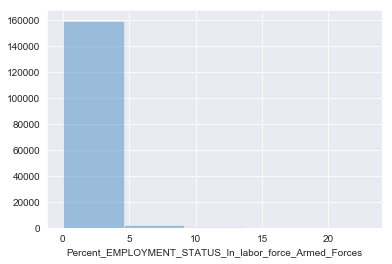

In [78]:
j ='Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)'
    
plot_=df[[j, target]]
plot_[j] = pd.cut(plot_[j], 5)

fig, ax = plt.subplots(figsize=(16,5))
plt.subplot(121)
sns.barplot(x=j, y=target, data=plot_).set_title(f"Cost Ratio to {j}")
plt.subplot(122)
sns.distplot(df[j], bins=5, kde=False)
plt.show()